In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

## Read the sampled dataset


In [3]:
#Read dataset
df = pd.read_csv('C:\\Users\\aayus\\Documents\\Brahmastra\\Intrusion-Detection-System-Using-Machine-Learning-main\\data\\CICIDS2017_sample.csv')
# The results in this code is based on the original CICIDS2017 dataset. Please go to cell [10] if you work on the sampled dataset. 

In [4]:
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [5]:
df.Label.value_counts()

BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

### Data sampling
Due to the space limit of GitHub files, we sample a small-sized subset for model learning using random sampling

In [6]:
# Randomly sample instances from majority classes
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')|(df['Label']=='Infiltration')]
df_BENIGN = df[(df['Label']=='BENIGN')]
df_BENIGN = df_BENIGN.sample(n=None, frac=0.01, replace=False, weights=None, random_state=None, axis=0)
df_DoS = df[(df['Label']=='DoS')]
df_DoS = df_DoS.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_PortScan = df[(df['Label']=='PortScan')]
df_PortScan = df_PortScan.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_BruteForce = df[(df['Label']=='BruteForce')]
df_BruteForce = df_BruteForce.sample(n=None, frac=0.2, replace=False, weights=None, random_state=None, axis=0)

In [7]:
df_s = df_BENIGN.append(df_DoS).append(df_PortScan).append(df_BruteForce).append(df_minor)

In [8]:
df_s = df_s.sort_index()

In [9]:
# Save the sampled dataset
!pip install --upgrade pandas
!pip install --upgrade numpy scipy dask
!pip install pipdeptree
!pipdeptree

!pip list
!pip install pandas
!pip uninstall pandas -y
!pip install pandas==2.2.0  # or another stable version like 2.1.0 or 2.0.3

df_s.to_csv('C:\\Users\\aayus\\Documents\\Brahmastra\\Intrusion-Detection-System-Using-Machine-Learning-main\\data\\CICIDS2017_sample.csv',index=0)

  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl (11.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2


ERROR: Cannot uninstall pandas 2.2.2, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps pandas==2.2.2'.


  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\aayus\\AppData\\Local\\Temp\\pip-uninstall-vqctm5i5\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached pipdeptree-2.23.4-py3-none-any.whl (32 kB)
  Using cached pip-24.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\ProgramData\Anaconda3\python.exe -m pip install pipdeptree
'pipdeptree' is not recognized as an internal or external command,
operable program or batch file.


Package                         Version
------------------------------- --------------------
absl-py                         1.4.0
alabaster                       0.7.12
anaconda-anon-usage             0.4.4
anaconda-client                 1.11.0
anaconda-navigator              2.4.3
anaconda-project                0.11.1
anyio                           3.5.0
appdirs                         1.4.4
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
arrow                           1.2.2
astroid                         2.11.7
astropy                         5.1
astunparse                      1.6.3
atomicwrites                    1.4.0
attrs                           21.4.0
Automat                         20.2.0
autopep8                        1.6.0
Babel                           2.9.1
backcall                        0.2.0
backports.functools-lru-cache   1.6.4
backports.tempfile              1.0
backports.weakref               1.0.post1
bcrypt                   

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pandas-2.2.2.dist-info\\METADATA'



Found existing installation: pandas 2.2.2


ERROR: Cannot uninstall pandas 2.2.2, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps pandas==2.2.2'.
ERROR: Invalid requirement: '#'


### Preprocessing (normalization and padding values)

In [10]:
df = pd.read_csv('C:\\Users\\aayus\\Documents\\Brahmastra\\Intrusion-Detection-System-Using-Machine-Learning-main\\data\\CICIDS2017_sample.csv')

In [11]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

### split train set and test set

In [12]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [13]:
X_train.shape

(5048, 77)

In [14]:
pd.Series(y_train).value_counts()

6    1744
1    1573
3     761
2     442
5     317
0     182
4      29
dtype: int64

### Oversampling by SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500}) # Create 1500 samples for the minority class "4"

In [16]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [17]:
pd.Series(y_train).value_counts()

6    1744
1    1573
4    1500
3     761
2     442
5     317
0     182
dtype: int64

## Machine learning model training

### Training four base learners: decision tree, random forest, extra trees, XGBoost

Accuracy of DT: 0.9841646872525732
Precision of DT: 0.9846033152491303
Recall of DT: 0.9841646872525732
F1-score of DT: 0.9843463549991028
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        45
           1       1.00      0.99      1.00       393
           2       0.99      0.98      0.99       111
           3       0.98      0.98      0.98       191
           4       0.71      0.71      0.71         7
           5       0.99      1.00      0.99        80
           6       1.00      0.99      0.99       436

    accuracy                           0.98      1263
   macro avg       0.93      0.93      0.93      1263
weighted avg       0.98      0.98      0.98      1263



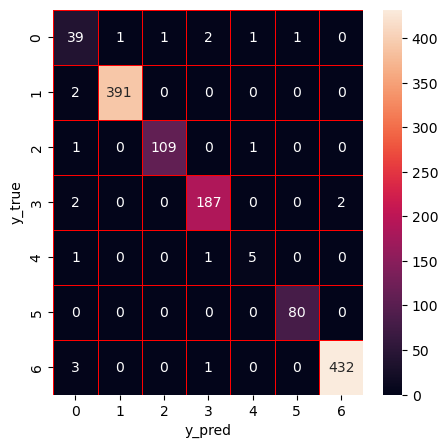

In [18]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [19]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9873317498020586
Precision of RF: 0.9877374075051564
Recall of RF: 0.9873317498020586
F1-score of RF: 0.987366442986679
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        45
           1       0.99      0.99      0.99       393
           2       0.98      0.98      0.98       111
           3       0.98      0.98      0.98       191
           4       1.00      0.71      0.83         7
           5       0.99      1.00      0.99        80
           6       1.00      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.97      0.94      0.95      1263
weighted avg       0.99      0.99      0.99      1263



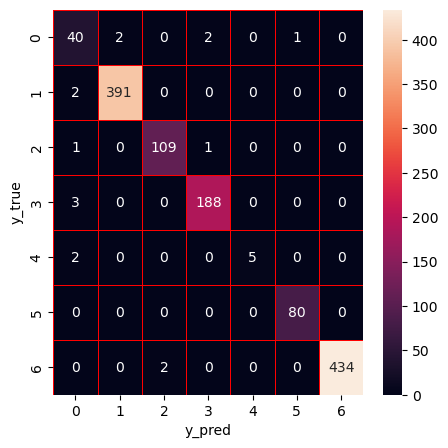

In [20]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [21]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.9881235154394299
Precision of ET: 0.9882449626886508
Recall of ET: 0.9881235154394299
F1-score of ET: 0.9880397947544486
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.99      0.99      0.99       393
           2       0.98      0.97      0.98       111
           3       0.98      0.99      0.99       191
           4       1.00      0.71      0.83         7
           5       0.99      1.00      0.99        80
           6       1.00      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.97      0.94      0.95      1263
weighted avg       0.99      0.99      0.99      1263



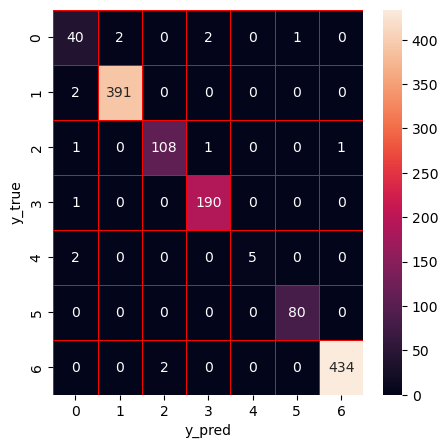

In [22]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [23]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9873317498020586
Precision of XGBoost: 0.9872747671890924
Recall of XGBoost: 0.9873317498020586
F1-score of XGBoost: 0.9871749924379144
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        45
           1       0.99      0.99      0.99       393
           2       0.99      0.99      0.99       111
           3       0.99      1.00      0.99       191
           4       0.62      0.71      0.67         7
           5       0.98      0.99      0.98        80
           6       1.00      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.92      0.93      0.92      1263
weighted avg       0.99      0.99      0.99      1263



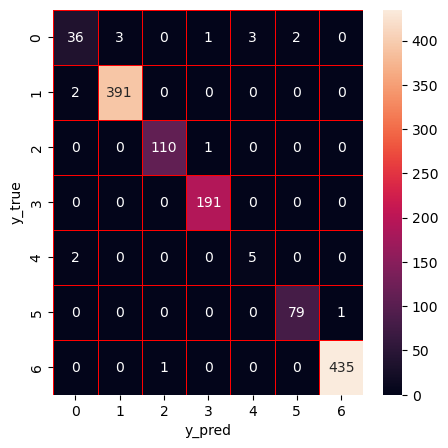

In [24]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [25]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

### Stacking model construction (ensemble for 4 base learners)

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Sample data (make sure these variables are already defined in your code)
# dt_train, rf_train, et_train, xg_train should be numpy arrays or similar

# Create a DataFrame with predictions from different models
base_predictions_train = pd.DataFrame({
    'DecisionTree': np.ravel(dt_train),
    'RandomForest': np.ravel(rf_train),
    'ExtraTrees': np.ravel(et_train),
    'XgBoost': np.ravel(xg_train),
})

# Display the first 5 rows of the DataFrame
print(base_predictions_train.head(5))


   DecisionTree  RandomForest  ExtraTrees  XgBoost
0             1             1           1        1
1             6             6           6        6
2             3             3           3        3
3             6             6           6        6
4             2             2           2        2


In [27]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [28]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [29]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 0.9833729216152018
Precision of Stacking: 0.9841169582205412
Recall of Stacking: 0.9833729216152018
F1-score of Stacking: 0.9836706951569152
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        45
           1       0.99      0.99      0.99       393
           2       1.00      0.97      0.99       111
           3       0.99      0.98      0.98       191
           4       0.62      0.71      0.67         7
           5       0.99      1.00      0.99        80
           6       1.00      0.99      0.99       436

    accuracy                           0.98      1263
   macro avg       0.91      0.93      0.92      1263
weighted avg       0.98      0.98      0.98      1263



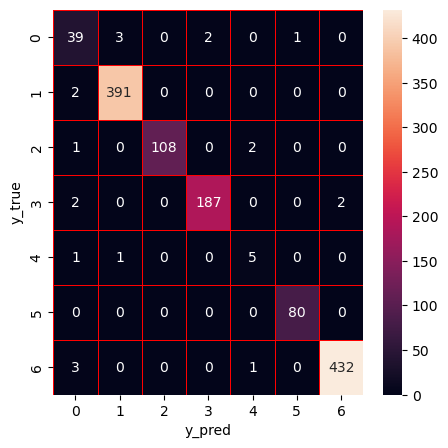

In [30]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Feature Selection

### Feature importance

In [31]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [32]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [33]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.1127, 'Init_Win_bytes_backward'), (0.1015, 'Fwd Packet Length Max'), (0.0792, 'Max Packet Length'), (0.0747, 'min_seg_size_forward'), (0.0614, 'Flow IAT Max'), (0.0366, 'Init_Win_bytes_forward'), (0.0263, 'Packet Length Mean'), (0.0219, 'Bwd Packet Length Min'), (0.0218, 'Flow Duration'), (0.0215, 'Bwd Packets/s'), (0.0207, 'Flow IAT Std'), (0.0186, 'Total Length of Fwd Packets'), (0.0185, 'Avg Bwd Segment Size'), (0.0182, 'Bwd Packet Length Std'), (0.0167, 'Average Packet Size'), (0.0154, 'Flow IAT Mean'), (0.0153, 'PSH Flag Count'), (0.0131, 'Total Backward Packets'), (0.013, 'Bwd Packet Length Mean'), (0.0125, 'Fwd IAT Total'), (0.0118, 'Fwd Header Length'), (0.0116, 'Bwd Packet Length Max'), (0.0114, 'Bwd IAT Total'), (0.0113, 'Fwd Packet Length Std'), (0.0109, 'Fwd PSH Flags'), (0.0106, 'Fwd IAT Max'), (0.0103, 'Active Max'), (0.01, 'Subflow Bwd Packets'), (0.01, 'Fwd IAT Std'), (0.01, 'Bwd IAT Std'), (0.0099, 'Total Length of Bwd Packets'), (0.

In [34]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [35]:
len(f_list)

77

In [36]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break        

In [37]:
X_fs = df[fs].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [39]:
X_train.shape

(5048, 39)

In [40]:
pd.Series(y_train).value_counts()

6    1744
1    1573
3     761
2     442
5     317
0     182
4      29
dtype: int64

### Oversampling by SMOTE

In [41]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500})

In [42]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [43]:
pd.Series(y_train).value_counts()

6    1744
1    1573
4    1500
3     761
2     442
5     317
0     182
dtype: int64

## Machine learning model training after feature selection

Accuracy of DT: 0.9857482185273159
Precision of DT: 0.9855461893604585
Recall of DT: 0.9857482185273159
F1-score of DT: 0.985531346253258
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       1.00      0.99      1.00       393
           2       0.99      0.98      0.99       111
           3       0.97      0.97      0.97       191
           4       0.80      0.57      0.67         7
           5       0.99      1.00      0.99        80
           6       0.99      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.94      0.92      0.93      1263
weighted avg       0.99      0.99      0.99      1263



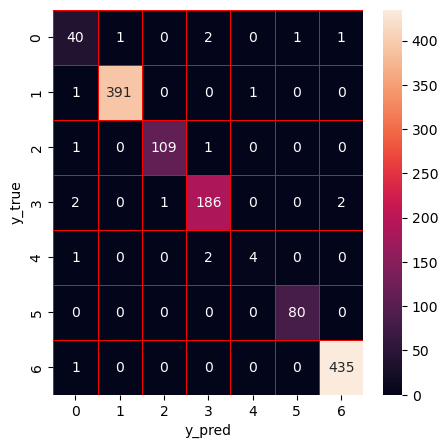

In [44]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [45]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9897070467141726
Precision of RF: 0.9899650380201408
Recall of RF: 0.9897070467141726
F1-score of RF: 0.9896787887664741
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        45
           1       0.99      0.99      0.99       393
           2       1.00      0.98      0.99       111
           3       0.98      0.99      0.99       191
           4       1.00      0.71      0.83         7
           5       0.99      1.00      0.99        80
           6       1.00      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.97      0.94      0.95      1263
weighted avg       0.99      0.99      0.99      1263



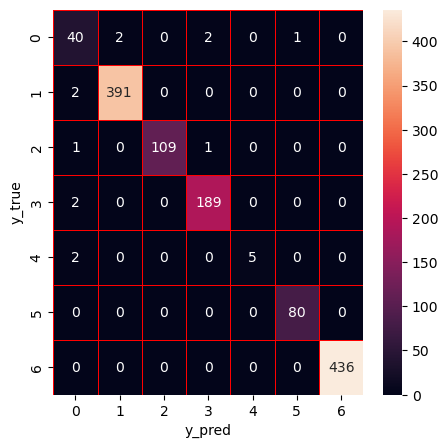

In [46]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [47]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.9881235154394299
Precision of ET: 0.9880114160501933
Recall of ET: 0.9881235154394299
F1-score of ET: 0.9880284685852434
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.99      0.99      0.99       393
           2       0.99      0.97      0.98       111
           3       0.98      0.99      0.99       191
           4       0.83      0.71      0.77         7
           5       0.99      1.00      0.99        80
           6       1.00      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.95      0.93      0.94      1263
weighted avg       0.99      0.99      0.99      1263



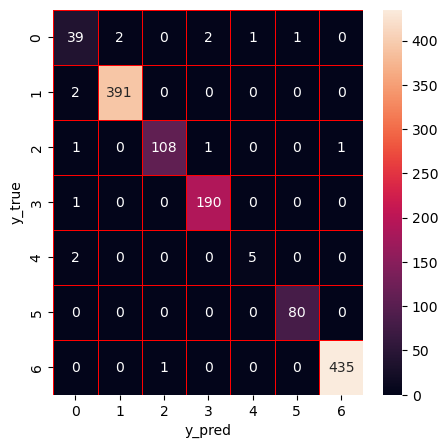

In [48]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [49]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9857482185273159
Precision of XGBoost: 0.9855489460444958
Recall of XGBoost: 0.9857482185273159
F1-score of XGBoost: 0.9853504471771772
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        45
           1       0.99      0.99      0.99       393
           2       0.96      0.99      0.98       111
           3       0.97      1.00      0.98       191
           4       0.83      0.71      0.77         7
           5       0.99      0.99      0.99        80
           6       1.00      0.99      0.99       436

    accuracy                           0.99      1263
   macro avg       0.96      0.93      0.94      1263
weighted avg       0.99      0.99      0.99      1263



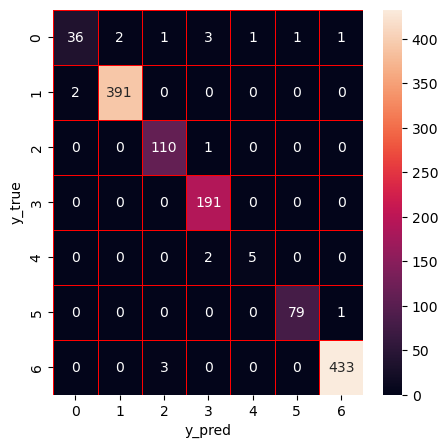

In [50]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [51]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

### Stacking model construction

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Sample data (make sure these variables are already defined in your code)
# dt_train, rf_train, et_train, xg_train should be numpy arrays or similar

# Create a DataFrame with predictions from different models
base_predictions_train = pd.DataFrame({
    'DecisionTree': np.ravel(dt_train),
    'RandomForest': np.ravel(rf_train),
    'ExtraTrees': np.ravel(et_train),
    'XgBoost': np.ravel(xg_train),
})

# Display the first 5 rows of the DataFrame
print(base_predictions_train.head(5))


   DecisionTree  RandomForest  ExtraTrees  XgBoost
0             1             1           1        1
1             6             6           6        6
2             3             3           3        3
3             6             6           6        6
4             2             2           2        2


In [53]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [54]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9873317498020586
Precision of Stacking: 0.9874762634666863
Recall of Stacking: 0.9873317498020586
F1-score of Stacking: 0.987246758942935
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       1.00      1.00      1.00       393
           2       1.00      0.97      0.99       111
           3       0.97      0.98      0.98       191
           4       1.00      0.71      0.83         7
           5       0.99      1.00      0.99        80
           6       0.99      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.97      0.94      0.95      1263
weighted avg       0.99      0.99      0.99      1263



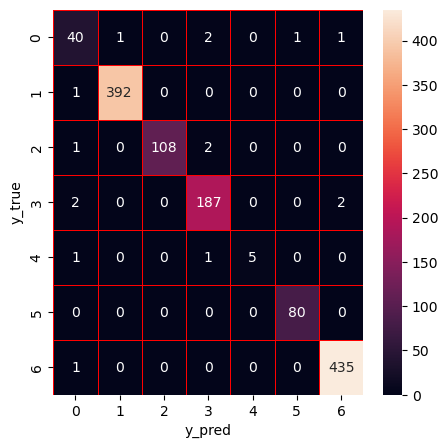

In [55]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()